<a href="https://colab.research.google.com/github/Joshni1403/Collab-Class-works/blob/main/country_development_python_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Which variables contribute the most to overall country development?

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()



Saving data.csv to data.csv


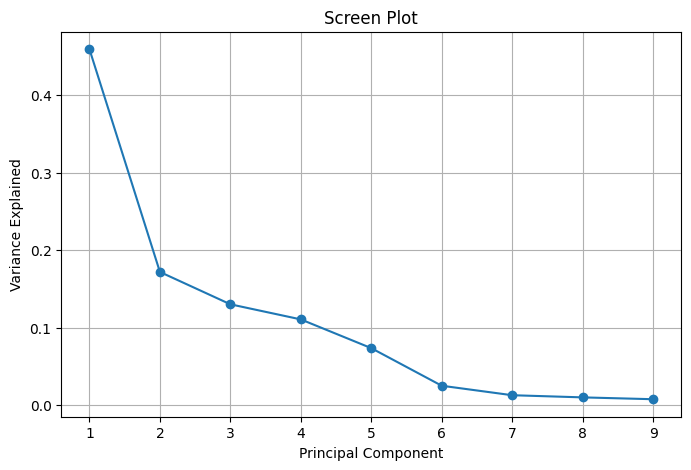

,PC1,PC2
life_expec,0.425839,-0.222707
income,0.398441,0.022536
gdpp,0.392645,-0.046022
exports,0.283897,0.613163
imports,0.161482,0.671821
health,0.150838,-0.243087
inflation,-0.193173,-0.008404
total_fer,-0.403729,0.155233
child_mort,-0.419519,0.192884


In [ ]:
df = pd.read_csv('data.csv')
# Drop the non-numeric column
features = df.drop(columns=['country'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(features.columns))])

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()
# Get loadings (contributions)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features.columns))], index=features.columns)

# Show contribution to PC1 and PC2
loadings[['PC1', 'PC2']].sort_values(by='PC1', ascending=False)



INTERPRETATION

Variables with high positive values in PC1 are strong positive contributors (e.g. life_expec, income, gdpp)

Variables with large negative values are inversely related (e.g. child_mort, total_fer)

PC2 often reflects other structures like trade (exports/imports)

# 2. Can we group countries based on similar economic and health profiles using PCA?

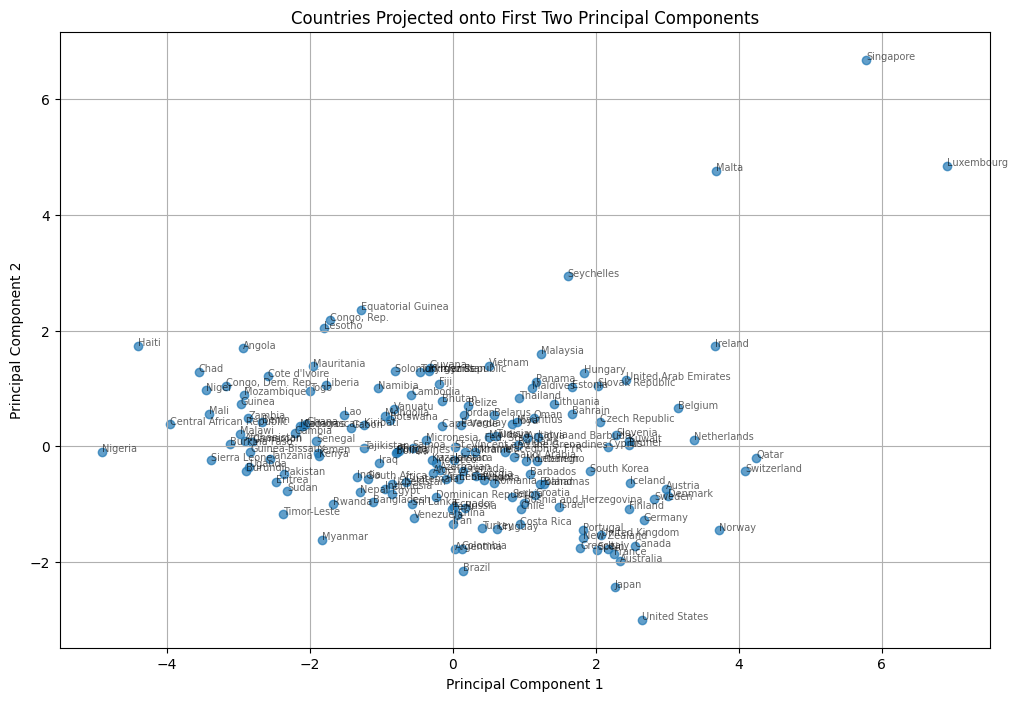

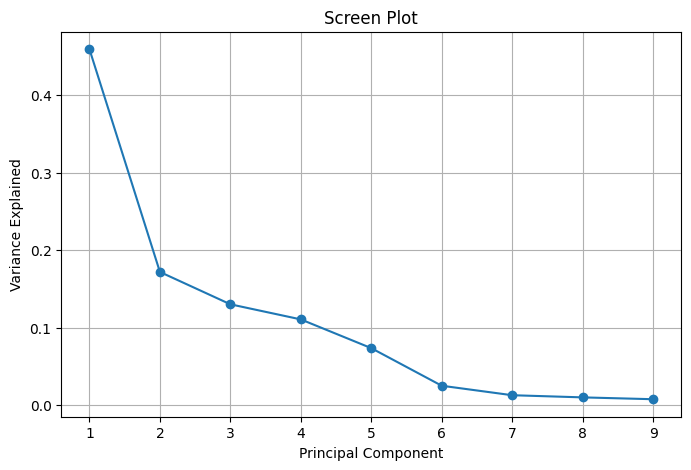

Total variance explained by PC1 and PC2: 0.6313336543771411


In [ ]:
# Add back country names for plotting
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(features.columns))])
pca_df['country'] = df['country']

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
for i, txt in enumerate(pca_df['country']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=7, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Countries Projected onto First Two Principal Components')
plt.grid(True)
plt.show()
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Check variance explained by PC1 and PC2
print("Total variance explained by PC1 and PC2:",
      pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])


INTERPRETATION

we can use the scatter plot to visually group countries — clusters that are close together share similar economic and health profiles.

# 3. How much of the total variance is explained by the first two principal components?

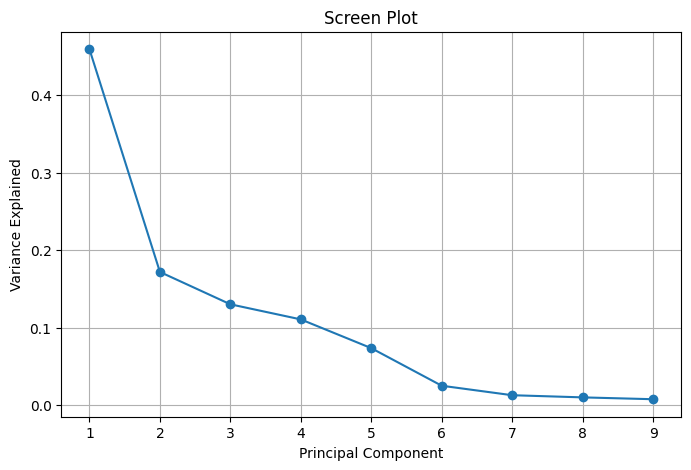

PC1 explains: 45.95%
PC2 explains: 17.18%
Total variance (PC1 + PC2): 63.13%


In [ ]:
# Screen plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()
# Print how much variance PC1 and PC2 explain
explained = pca.explained_variance_ratio_
print(f"PC1 explains: {explained[0]*100:.2f}%")
print(f"PC2 explains: {explained[1]*100:.2f}%")
print(f"Total variance (PC1 + PC2): {(explained[0] + explained[1])*100:.2f}%")


# 4. Can we predict life_expec using income or health expenditure?

In [ ]:
import statsmodels.api as sm

X_income = df[['income']]
y = df['life_expec']

# Add constant (intercept)
X_income = sm.add_constant(X_income)

model_income = sm.OLS(y, X_income).fit()
print(model_income.summary())
X_health = df[['health']]
X_health = sm.add_constant(X_health)

model_health = sm.OLS(y, X_health).fit()
print(model_health.summary())


                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     98.79
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.55e-18
Time:                        07:12:41   Log-Likelihood:                -562.23
No. Observations:                 167   AIC:                             1128.
Df Residuals:                     165   BIC:                             1135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7157      0.732     89.832      0.0

INTERPRETATION
Income is a strong predictor of life expectancy: countries with higher income tend to live longer.

Health expenditure is also positively related to life expectancy, though the effect might be smaller.

# 5. What are the significant predictors of GDP per capita (gdpp)

In [ ]:
import statsmodels.api as sm

# Define predictors and target variable
X = df[['income', 'exports', 'imports', 'health', 'inflation']]
y = df['gdpp']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   gdpp   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.48e-66
Time:                        07:15:31   Log-Likelihood:                -1712.8
No. Observations:                 167   AIC:                             3438.
Df Residuals:                     161   BIC:                             3456.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.017e+04   2036.648     -4.993      0.0

INTERPRETATION

Income: Strong positive predictor (significant, high coefficient)

Exports: Positive relationship

Health expenditure: Maybe mildly positive

Inflation: Likely negative (if significant)

Imports: Can vary, sometimes not significant

# 6. What is the distribution of GDP per capita across countries?

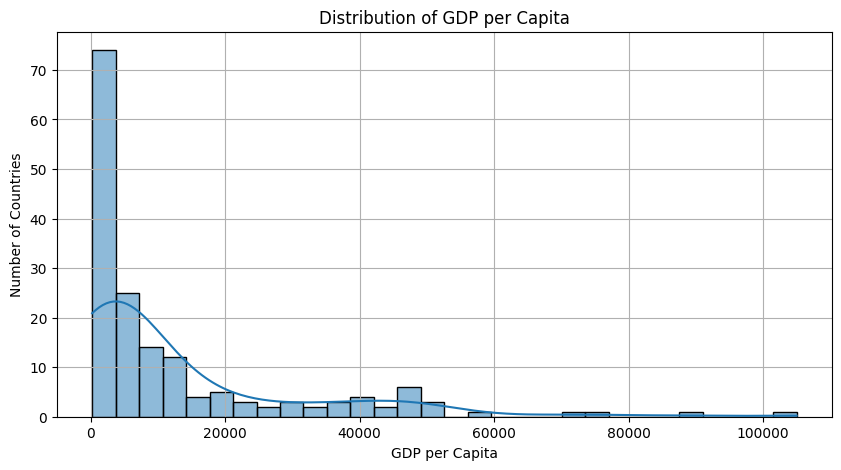

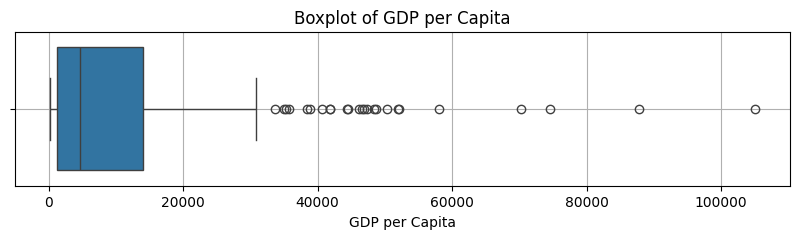

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of gdpp
plt.figure(figsize=(10, 5))
sns.histplot(df['gdpp'], kde=True, bins=30)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

# Boxplot of gdpp
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['gdpp'])
plt.title('Boxplot of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.grid(True)
plt.show()


Interpretation

Most countries have low to moderate GDP per capita, with a few high-income countries acting as outliers. The distribution is right-skewed, meaning a small number of countries are extremely rich compared to the rest.

# 7. Which countries have the highest and lowest child mortality rates?

<ipython-input-12-ac0bcea4dc40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='child_mort', y='country', data=top_mort, palette='Reds_r')


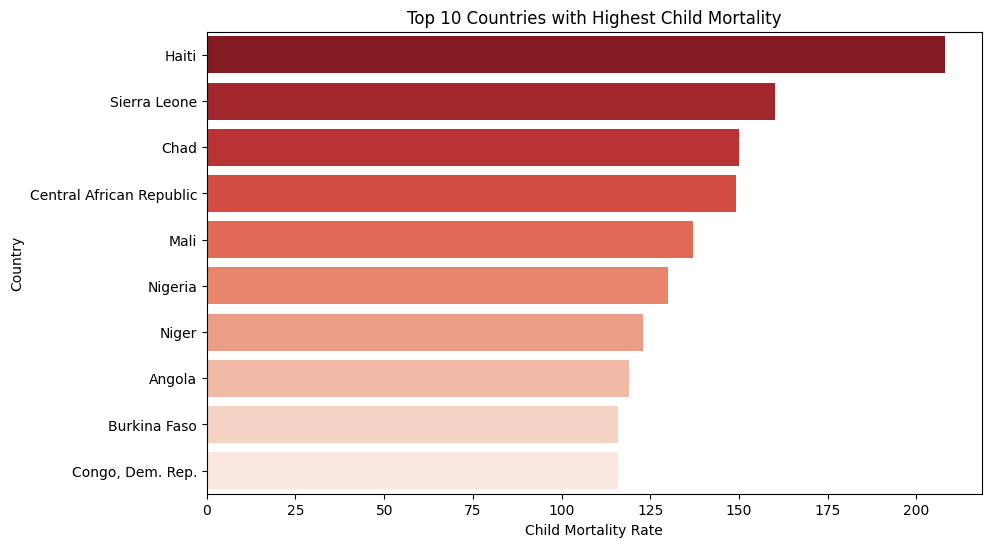

<ipython-input-12-ac0bcea4dc40>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='child_mort', y='country', data=low_mort, palette='Greens')


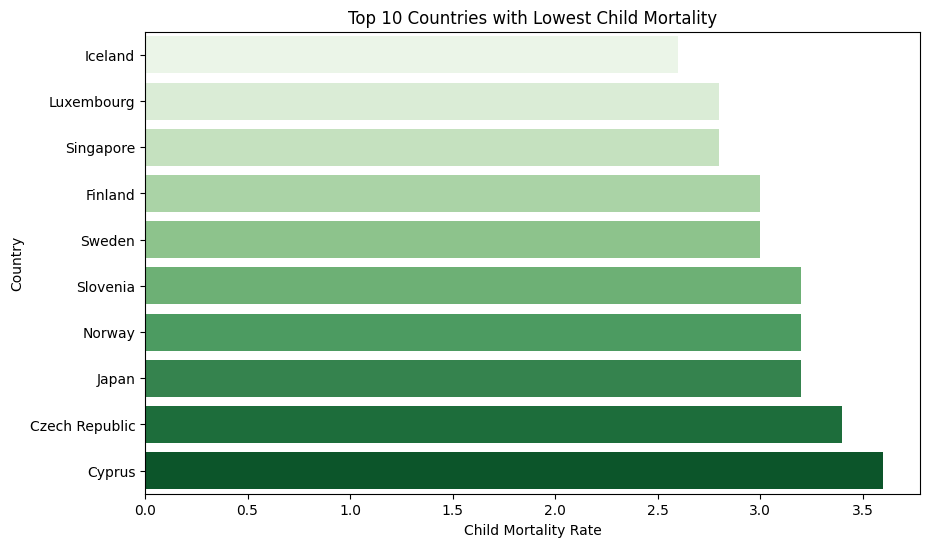

In [ ]:
top_mort = df.sort_values(by='child_mort', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='child_mort', y='country', data=top_mort, palette='Reds_r')
plt.title('Top 10 Countries with Highest Child Mortality')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.show()
low_mort = df.sort_values(by='child_mort', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='child_mort', y='country', data=low_mort, palette='Greens')
plt.title('Top 10 Countries with Lowest Child Mortality')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.show()


Interpretation

Highest child mortality is typically seen in low-income developing countries, often in Sub-Saharan Africa.

Lowest child mortality is found in high-income nations with good healthcare (e.g., Norway, Japan, Switzerland).

# 8. Do countries with higher health expenditure have lower child mortality?

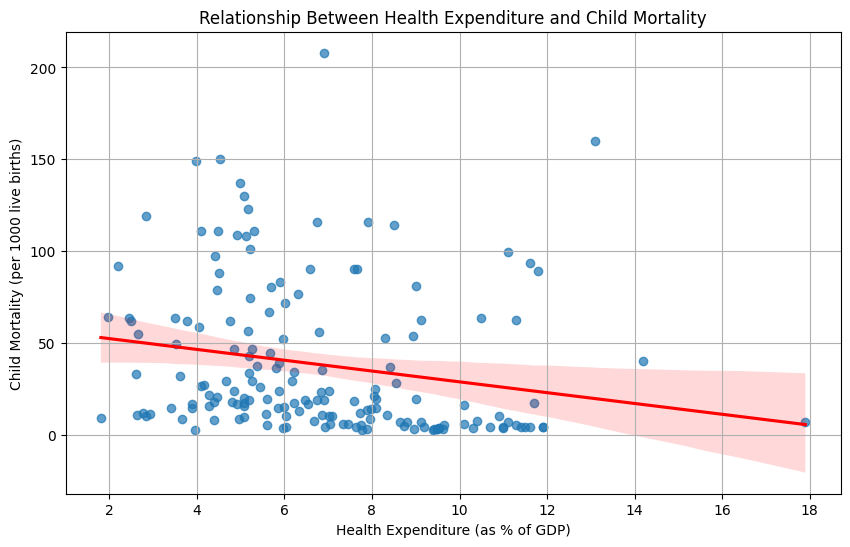

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='health', y='child_mort', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Relationship Between Health Expenditure and Child Mortality')
plt.xlabel('Health Expenditure (as % of GDP)')
plt.ylabel('Child Mortality (per 1000 live births)')
plt.grid(True)
plt.show()


Interpretation

Countries that invest more in health tend to have lower child mortality rates. However, the relationship may not be perfectly linear, and other variables (like income, sanitation, education) also play a role.

# 9. Are there any outliers in inflation rates?

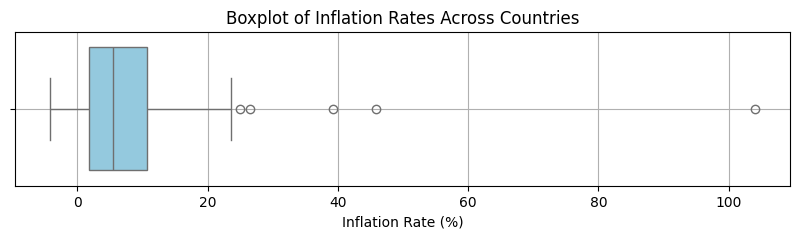

,country,inflation
49,Equatorial Guinea,24.9
103,Mongolia,39.2
113,Nigeria,104.0
149,Timor-Leste,26.5
163,Venezuela,45.9


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['inflation'], color='skyblue')
plt.title('Boxplot of Inflation Rates Across Countries')
plt.xlabel('Inflation Rate (%)')
plt.grid(True)
plt.show()
# Identify outliers using IQR method
Q1 = df['inflation'].quantile(0.25)
Q3 = df['inflation'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['inflation'] < Q1 - 1.5 * IQR) | (df['inflation'] > Q3 + 1.5 * IQR)]

outliers[['country', 'inflation']]



Interpretation

The boxplot shows several countries with extremely high inflation, which are likely economic outliers (e.g., countries facing crises, hyperinflation).
Most countries have inflation clustered within a normal range, e.g., between 0–10%.

# 10.How do GDP, income, and life expectancy relate together?

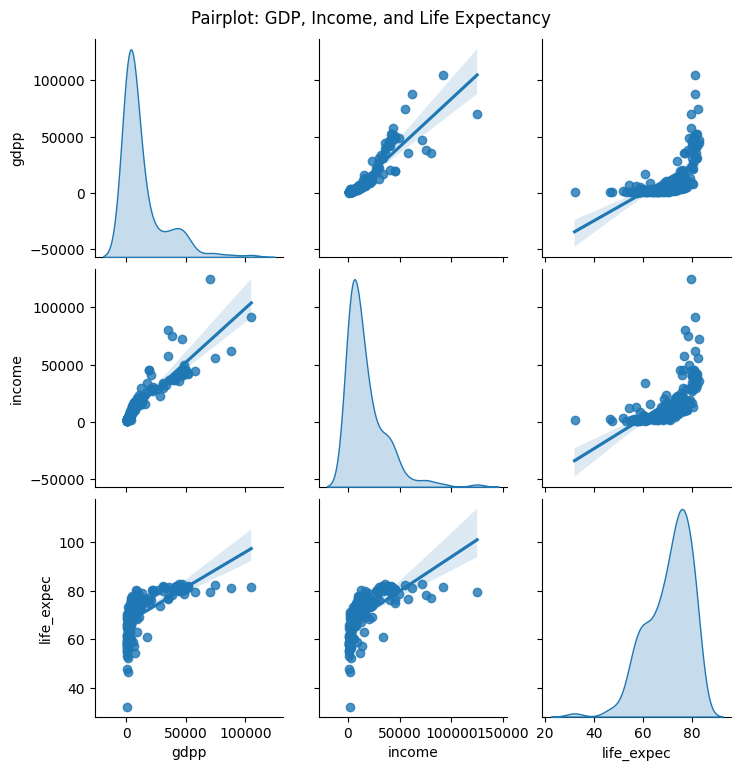

Text(0.5, 1.0, 'GDP per Capita vs Income')

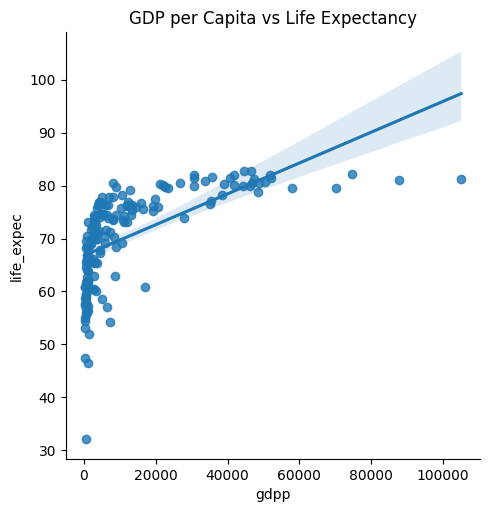

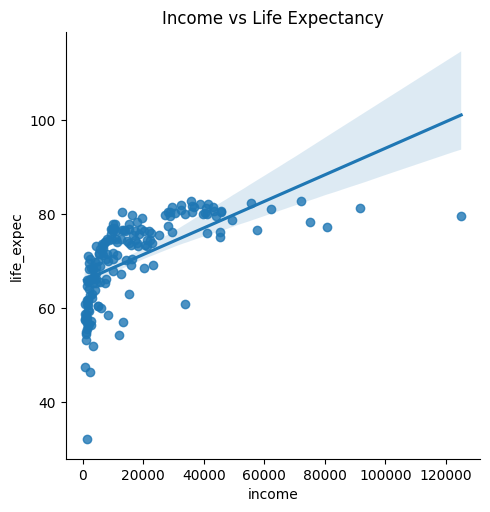

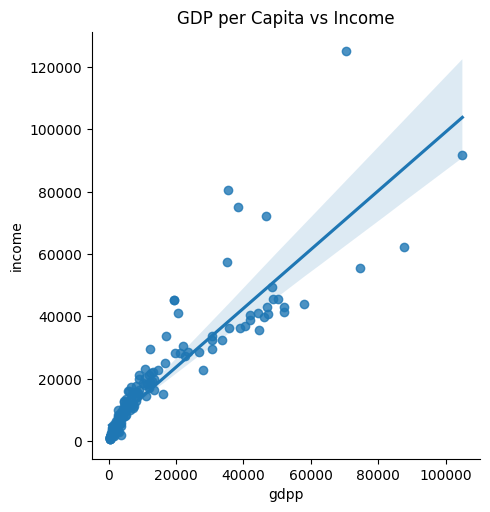

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['gdpp', 'income', 'life_expec']], kind='reg', diag_kind='kde')
plt.suptitle('Pairplot: GDP, Income, and Life Expectancy', y=1.02)
plt.show()
# GDP vs Life Expectancy
sns.lmplot(x='gdpp', y='life_expec', data=df)
plt.title('GDP per Capita vs Life Expectancy')

# Income vs Life Expectancy
sns.lmplot(x='income', y='life_expec', data=df)
plt.title('Income vs Life Expectancy')

# GDP vs Income
sns.lmplot(x='gdpp', y='income', data=df)
plt.title('GDP per Capita vs Income')



Interpretation

Countries with higher GDP and income levels generally enjoy higher life expectancy. This reflects better access to healthcare, nutrition, education, and overall quality of life.

# QUESTIONS 11 - 15 **(ANSWERS ONLY)**

QUESTION NO 11


In [ ]:
x = 5
if x == 5:
    print("x is 5")


x is 5


QUESTION NO 12

In [ ]:
for i in range(5):
    print(i)


0
1
2
3
4


QUESTION NO 13

In [ ]:
#13

def greet():
    print("Hello")


In [ ]:
greet()

Hello


QUESTION NO 14

In [ ]:
import numpy as np
a = np.array([1, 2, 3, 4])
print(a)

[1 2 3 4]


QUESTION 15

In [ ]:
import numpy as np

arr = np.array([10, 20, 30, 40])
indices = [True, False, True, False]
result = arr[indices]
print(result)


[10 30]
